In [ ]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(400, 400, 3))

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
# Create a new model by adding fully connected layers
model = Sequential()


model.add(vgg_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Freeze the weights of the VGG16 model
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
# Compile the model with a SGD optimizer
sgd = SGD(lr=0.0005, momentum=0.9)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/AI/bánh/TRAIN/', target_size=(400, 400), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/AI/bánh/TEST/', target_size=(400, 400), batch_size=32, class_mode='categorical')


Found 2425 images belonging to 10 classes.
Found 422 images belonging to 10 classes.


In [ ]:
# Train the model
model.fit_generator(train_generator, steps_per_epoch=len(train_generator), epochs=20, validation_data=test_generator, validation_steps=len(test_generator))
score = model.evaluate_generator(test_generator, steps=len(test_generator))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

<ipython-input-8-0a948d9e7399>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=len(train_generator), epochs=20, validation_data=test_generator, validation_steps=len(test_generator))


Epoch 1/20
76/76 [==============================] - 135s 2s/step - loss: 1.2204 - accuracy: 0.5538 - val_loss: 0.7955 - val_accuracy: 0.7844
Epoch 2/20
76/76 [==============================] - 135s 2s/step - loss: 1.2255 - accuracy: 0.5485 - val_loss: 0.8567 - val_accuracy: 0.7370
Epoch 3/20
76/76 [==============================] - 135s 2s/step - loss: 1.1646 - accuracy: 0.5753 - val_loss: 0.7579 - val_accuracy: 0.7725
Epoch 4/20
76/76 [==============================] - 136s 2s/step - loss: 1.1418 - accuracy: 0.5765 - val_loss: 0.8896 - val_accuracy: 0.7275
Epoch 5/20
76/76 [==============================] - 134s 2s/step - loss: 1.1900 - accuracy: 0.5608 - val_loss: 0.8166 - val_accuracy: 0.7654
Epoch 6/20
76/76 [==============================] - 135s 2s/step - loss: 1.1855 - accuracy: 0.5641 - val_loss: 0.7884 - val_accuracy: 0.7820
Epoch 7/20
76/76 [==============================] - 135s 2s/step - loss: 1.0754 - accuracy: 0.6136 - val_loss: 0.7465 - val_accuracy: 0.7820
Epoch 8/20
76

<ipython-input-8-0a948d9e7399>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator, steps=len(test_generator))


Test loss: 0.6072956323623657
Test accuracy: 0.7914692163467407


In [ ]:
#Save model
model.save('/content/drive/MyDrive/AI/models/Dish.h5')

In [4]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/AI/models/Dish.h5')

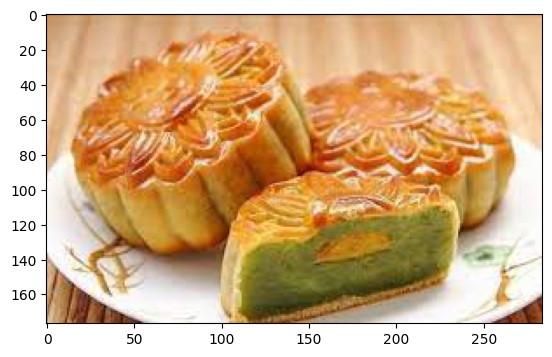

In [9]:
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
url = 'banhtrungthu.jpg'
img = load_img(url)
imshow(img)

1/1 [==============================] - 2s 2s/step


array([8])

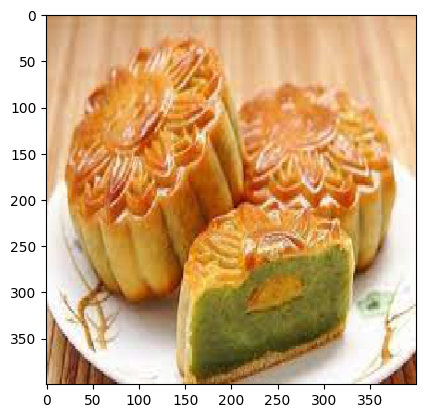

In [10]:
img = load_img(url, target_size = (400,400))
imshow(img)
img = img_to_array(img)
img = img.reshape(1,400,400,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = -1)